In [491]:
!pip install folium
#!rm *.

In [0]:
import xlrd, csv
import pandas as pd
import re, requests
from math import pi,sqrt,sin,cos,atan2
from tqdm import tqdm
import numpy as np

In [83]:
file = 'objects_hakaton_update.xlsx'
file1 = 'competitors_hakaton.xlsx'
#file=input()
#file1=input()


def csv_from_excel(file):

    wb = xlrd.open_workbook(file,'rb')
    print(wb.sheet_names())
    sh = wb.sheet_by_name('Лист1')
    file = re.sub(r'.xlsx', '', file)
    print(file)
    your_csv_file = open(file+'.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()
  
  
csv_from_excel(file)
csv_from_excel(file1)

['Лист1', 'Лист2', 'Лист3']
objects_hakaton_update
['Лист1', 'Лист2', 'Лист3']
competitors_hakaton


In [84]:
com = pd.read_csv('competitors_hakaton.csv') 
obj = pd.read_csv('objects_hakaton_update.csv') 
analys = pd.DataFrame(index=list(range(len(obj))),columns=['LATITUDE','LONGITUDE','date_open','business_area','value_old','value_new','locality_population','distance_1','Код объекта_1','Формат_1','Торговая площадь_1','latitude_1','longitude_1','distance_2','Код объекта_2','Формат_2','Торговая площадь_2','latitude_2','longitude_2'])
analys[['LATITUDE','LONGITUDE','date_open','business_area','value_old','value_new','locality_population']]=obj[['LATITUDE','LONGITUDE','date_open','business_area','value_old','value_new','locality_population']]
print(com.head())
print();print();print();print()
print(obj.head())
print();print();print();print()
print(analys.head())

buf = pd.DataFrame(index=list(range(len(com))),columns=['distance','Код объекта','Формат', 'Торговая площадь','latitude', 'longitude'])

                    Регион Код объекта  \
0  республика Башкортостан          c1   
1  республика Башкортостан          c1   
2  республика Башкортостан          c1   
3  республика Башкортостан          c2   
4  республика Башкортостан          c3   

                                       Адрес объекта          Формат  \
0  Республика Башкортостан, Салават, улица Губкин...  Прочие форматы   
1  Республика Башкортостан, Салават, бульвар Сала...  Прочие форматы   
2  Республика Башкортостан, Салават, улица Чапаев...  Прочие форматы   
3  Республика Башкортостан, Уфа, проспект Октября...  Прочие форматы   
4  Республика Башкортостан, Стерлитамак, микрорай...  Прочие форматы   

   Торговая площадь   latitude  longitude  
0             200.0  53.350202  55.948122  
1             200.0  53.342177  55.937710  
2             200.0  53.365184  55.936228  
3             200.0  54.774130  56.029838  
4             375.0  53.599821  55.937329  




    LATITUDE  LONGITUDE              REGION  d

In [86]:
for i in tqdm(range(len(obj))):
    mi_n = mi_n1 = 1000000000
    for j in range(len(com)):
        lat1 = float(obj.iloc[i, 0])
        long1 = float(obj.iloc[i, 1])
        lat2 = float(com.iloc[j, 5])
        long2 = float(com.iloc[j, 6])
        degree_to_rad = float(pi / 180.0)
        d_lat = (lat2 - lat1) * degree_to_rad
        d_long = (long2 - long1) * degree_to_rad
        a = pow(sin(d_lat / 2), 2) + cos(lat1 * degree_to_rad) * cos(lat2 * degree_to_rad) * pow(sin(d_long / 2), 2)
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        if ((mi_n > 6367 * c) or (mi_n1  >= 6367 * c)):
            buf.iloc[j , 0] = 6367 * c 
            buf.iloc[j , 1] =com.iloc[j, 1]
            buf.iloc[j , 2] =com.iloc[j, 3]
            buf.iloc[j , 3] =com.iloc[j, 4]
            buf.iloc[j , 4] =com.iloc[j, 5]
            buf.iloc[j , 5] =com.iloc[j, 6]
            mi_n1 = mi_n
            mi_n = 6367 * c
    buf=buf.sort_values(by='distance', ascending=True)
    analys.iloc[i,7]=buf.iloc[0,0]
    analys.iloc[i,8]=buf.iloc[0,1]
    analys.iloc[i,9]=buf.iloc[0,2]
    analys.iloc[i,10]=buf.iloc[0,3]
    analys.iloc[i,11]=buf.iloc[0,4]
    analys.iloc[i,12]=buf.iloc[0,5]
    analys.iloc[i,13]=buf.iloc[1,0]
    analys.iloc[i,14]=buf.iloc[1,1]
    analys.iloc[i,15]=buf.iloc[1,2]
    analys.iloc[i,16]=buf.iloc[1,3]
    analys.iloc[i,17]=buf.iloc[1,4]
    analys.iloc[i,18]=buf.iloc[1,5]
    
    
    #analys.iloc[i,7]=buf.iloc[0,0]
    #analys.iloc[i,8]=com.iloc[buf.loc[buf['len']==buf.iloc[0,0]].index[0],1]
    #analys.iloc[i,9]=com.iloc[buf.loc[buf['len']==buf.iloc[0,0]].index[0],3]
    #analys.iloc[i,10]=com.iloc[buf.loc[buf['len']==buf.iloc[0,0]].index[0],4]
    #analys.iloc[i,11]=com.iloc[buf.loc[buf['len']==buf.iloc[0,0]].index[0],5]
    #analys.iloc[i,12]=com.iloc[buf.loc[buf['len']==buf.iloc[0,0]].index[0],6]
    #analys.iloc[i,13]=buf.iloc[1,0]
    #analys.iloc[i,14]=com.iloc[buf.loc[buf['len']==buf.iloc[1,0]].index[0],1]
    #analys.iloc[i,15]=com.iloc[buf.loc[buf['len']==buf.iloc[1,0]].index[0],3]
    #analys.iloc[i,16]=com.iloc[buf.loc[buf['len']==buf.iloc[1,0]].index[0],4]
    #analys.iloc[i,17]=com.iloc[buf.loc[buf['len']==buf.iloc[1,0]].index[0],5]
    #analys.iloc[i,18]=com.iloc[buf.loc[buf['len']==buf.iloc[1,0]].index[0],6]



100%|██████████| 521/521 [01:57<00:00,  4.35it/s]

    LATITUDE  LONGITUDE  date_open  business_area   value_old   value_new  \
0  45.065926  39.041640    42874.0          640.0  123.509252  150.000000   
1  44.981387  37.267516    42633.0          372.0  122.289183  146.461194   
2  44.875977  37.325717    42481.0          586.0  138.055594  141.798052   
3  45.210160  36.708827    43084.0          399.0   77.170644  128.653940   
4  44.886060  37.326439    41958.0          379.0  116.957678  121.087116   

   locality_population distance_1 Код объекта_1            Формат_1  \
0             899541.0  0.0343516           c43  дискаунтер сетевой   
1               7936.0   0.429577           c34      Прочие форматы   
2              58990.0   0.302937           c43  дискаунтер сетевой   
3              10027.0   0.215668           c43  дискаунтер сетевой   
4              58990.0   0.198539           c43  дискаунтер сетевой   

   Торговая площадь_1 latitude_1 longitude_1 distance_2 Код объекта_2  \
0                 284    45.0601     

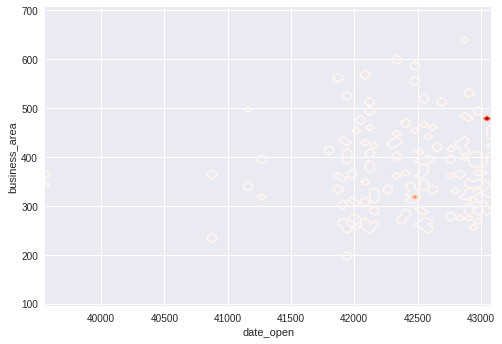

In [558]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


 
# Create and shor the 2D Density plot
ax = sns.kdeplot(analys['date_open'], analys['business_area'], cmap="Reds", shade=False, bw=.15, cbar=True)
ax.set(xlabel='date_open', ylabel='business_area')
plt.show()

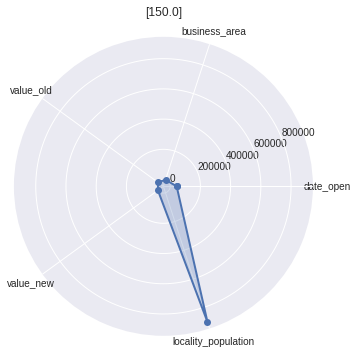

In [561]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


"""
   #             Name  Attack  Defense  Speed  Range  Health
0  1         Iron Man      83       80     75     70      70
1  2  Captain America      60       62     63     80      80
2  3             Thor      80       82     83    100     100
3  3             Hulk      80      100     67     44      92
4  4      Black Widow      52       43     60     50      65
5  5          Hawkeye      58       64     58     80      65

"""

# Get the data for Iron Man
labels=np.array(["date_open", "business_area", "value_old", "value_new"])
stats=analys.loc[0,labels].values

# Make some calculations for the plot
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

# Plot stuff
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([analys.loc[0,"locality_population"]])
ax.grid(True)

plt.show()

In [439]:
analys.to_csv('analys.csv',index=False)
data = pd.read_csv('analys.csv')



data['Код объекта_1'] = data['Код объекта_1'].str.replace('c','').astype(int)
data['Код объекта_2'] = data['Код объекта_2'].str.replace('c','').astype(int)

data[['Формат_1','Формат_2']]=data[['Формат_1','Формат_2']].replace('Прочие форматы', 0)
data[['Формат_1','Формат_2']]=data[['Формат_1','Формат_2']].replace('дискаунтер сетевой', 1)
data[['Формат_1','Формат_2']]=data[['Формат_1','Формат_2']].replace('супермаркет', 2)
data[['Формат_1','Формат_2']]=data[['Формат_1','Формат_2']].replace('гипермаркет', 3)
data[['Формат_1','Формат_2']]=data[['Формат_1','Формат_2']].replace('дискаунтер несетевой', 4)

print(data.head())
#for i in range(20):
    #print(data[data.columns[1:-1]].apply(lambda x: x.corr(data.iloc[1:,i])))

    LATITUDE  LONGITUDE  date_open  business_area   value_old   value_new  \
0  45.065926  39.041640    42874.0          640.0  123.509252  150.000000   
1  44.981387  37.267516    42633.0          372.0  122.289183  146.461194   
2  44.875977  37.325717    42481.0          586.0  138.055594  141.798052   
3  45.210160  36.708827    43084.0          399.0   77.170644  128.653940   
4  44.886060  37.326439    41958.0          379.0  116.957678  121.087116   

   locality_population  distance_1  Код объекта_1  Формат_1  \
0             899541.0    0.034352             43         1   
1               7936.0    0.429577             34         0   
2              58990.0    0.302937             43         1   
3              10027.0    0.215668             43         1   
4              58990.0    0.198539             43         1   

   Торговая площадь_1  latitude_1  longitude_1  distance_2  Код объекта_2  \
0                 284   45.060134    38.969734    0.258309             34   
1   

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import sklearn.model_selection as model_selection
from sklearn.metrics import mean_absolute_error


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.loc[:, data.columns != 'value_new'],data['value_new'], train_size=0.80)

mean = X_train.mean(axis=0)
# Стандартное отклонение
std = X_train.std(axis=0)
X_train = X_train- mean
X_train = X_train / std
X_test = X_test - mean
X_test = X_test / std

In [442]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)

In [482]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print("Средняя абсолютная ошибка: ", mae,"\nСреднеквадратическая ошибка: ", mse)

pred = np.ravel(model.predict(X_test))
y_test=np.array(y_test)


out = pd.DataFrame(index=list(range(len(y_test))),columns=['Расчитанное','Истинное'])
for i in range(len(pred)):
    out.iloc[i,0] = pred[i]
    out.iloc[i,1] = y_test[i]

print("Предсказанная эффективность:\n",out)
out.to_csv('result.csv', sep=' ',encoding='utf-8')

Средняя абсолютная ошибка:  4.3751673335120795 
Среднеквадратическая ошибка:  32.88630868820917
Предсказанная эффективность:
     Расчитанное Истинное
0       60.0421  55.7806
1       58.1456  52.0939
2         55.64  53.3563
3       47.4175  41.2901
4        47.873  46.2395
5       54.2543  62.5412
6       39.0015  39.4274
7       42.9135  39.6647
8       54.4171  54.8012
9       69.2626  69.3052
10      52.2782  51.2184
11      62.1997  55.3523
12      50.9957  64.9232
13      38.4355  40.2522
14      45.3919   49.987
15      46.7577  50.0102
16      47.8872  47.7379
17      53.2597  61.7636
18      37.3184  40.0635
19      33.8813   35.911
20      66.5811  67.3216
21      62.0452  51.4832
22      46.3392  52.9075
23      35.1335   41.995
24      56.1799  57.5347
25      50.7427  56.9909
26       55.378  61.9614
27      67.0613  70.8175
28      40.4991  43.4239
29      50.0725  40.6436
..          ...      ...
75      40.1371  48.7339
76       34.526  33.7645
77      46.5304  43.9486

In [545]:
import altair as alt
#print(out)
alt.Chart(out.astype(int)).mark_point(size=40).encode(
    x='Расчитанное:Q',
    y='Истинное:Q',
    color='Origin:N',
    tooltip=['Origin:N','Расчитанное:Q','Истинное:Q'] 
).configure_mark(
    opacity=0.6,
    
).interactive()

Chart({
  config: Config({
    mark: MarkConfig({
      opacity: 0.6
    })
  }),
  data:      Расчитанное  Истинное
  0             60        55
  1             58        52
  2             55        53
  3             47        41
  4             47        46
  5             54        62
  6             39        39
  7             42        39
  8             54        54
  9             69        69
  10            52        51
  11            62        55
  12            50        64
  13            38        40
  14            45        49
  15            46        50
  16            47        47
  17            53        61
  18            37        40
  19            33        35
  20            66        67
  21            62        51
  22            46        52
  23            35        41
  24            56        57
  25            50        56
  26            55        61
  27            67        70
  28            40        43
  29            50        40
  ..           ...       ...
  75            40        48
  76            34        33
  77            46        43
  78            37        41
  79            38        41
  80            42        44
  81           100       117
  82            31        37
  83            41        39
  84            41        41
  85            38        26
  86            65        69
  87            45        45
  88            47        47
  89            45        52
  90            43        45
  91            65        58
  92            44        44
  93            62        64
  94            57        53
  95            59        64
  96            66        67
  97            44        48
  98           141       146
  99            38        39
  100           46        50
  101           71        86
  102           47        48
  103           77        85
  104           41        39
  
  [105 rows x 2 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'Origin:N'
    }),
    tooltip: [Tooltip({
      shorthand: 'Origin:N'
    }), Tooltip({
      shorthand: 'Расчитанное:Q'
    }), Tooltip({
      shorthand: 'Истинное:Q'
    })],
    x: X({
      shorthand: 'Расчитанное:Q'
    }),
    y: Y({
      shorthand: 'Истинное:Q'
    })
  }),
  mark: MarkDef({
    size: 40,
    type: 'point'
  }),
  selection: SelectionMapping({
    selector121: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  })
})

In [0]:
.interactive()